In [4]:
import pandas as pd
train_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CC/Project - 2/train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CC/Project - 2/test.csv')

In [5]:
display(train_df.head())
display(test_df.head())

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv
0,1,Male,Urban,Bachelor,5L-10L,1,5,5790,More than 1,A,Platinum,64308
1,2,Male,Rural,High School,5L-10L,0,8,5080,More than 1,A,Platinum,515400
2,3,Male,Urban,Bachelor,5L-10L,1,8,2599,More than 1,A,Platinum,64212
3,4,Female,Rural,High School,5L-10L,0,7,0,More than 1,A,Platinum,97920
4,5,Male,Urban,High School,More than 10L,1,6,3508,More than 1,A,Gold,59736


,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy
0,89393,Female,Rural,High School,5L-10L,0,6,2134,More than 1,B,Silver
1,89394,Female,Urban,High School,2L-5L,0,4,4102,More than 1,A,Platinum
2,89395,Male,Rural,High School,5L-10L,1,7,2925,More than 1,B,Gold
3,89396,Female,Rural,Bachelor,More than 10L,1,2,0,More than 1,B,Silver
4,89397,Female,Urban,High School,2L-5L,0,5,14059,More than 1,B,Silver


In [6]:
train_df.info()
test_df.info()
display(train_df.describe())
display(test_df.describe())
display(train_df.isnull().sum())
display(test_df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89392 entries, 0 to 89391
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              89392 non-null  int64 
 1   gender          89392 non-null  object
 2   area            89392 non-null  object
 3   qualification   89392 non-null  object
 4   income          89392 non-null  object
 5   marital_status  89392 non-null  int64 
 6   vintage         89392 non-null  int64 
 7   claim_amount    89392 non-null  int64 
 8   num_policies    89392 non-null  object
 9   policy          89392 non-null  object
 10  type_of_policy  89392 non-null  object
 11  cltv            89392 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 8.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59595 entries, 0 to 59594
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              59595 n

,id,marital_status,vintage,claim_amount,cltv
count,89392.000000,89392.000000,89392.000000,89392.000000,89392.000000
mean,44696.500000,0.575488,4.595669,4351.502416,97952.828978
std,25805.391969,0.494272,2.290446,3262.359775,90613.814793
min,1.000000,0.000000,0.000000,0.000000,24828.000000
25%,22348.750000,0.000000,3.000000,2406.000000,52836.000000
50%,44696.500000,1.000000,5.000000,4089.000000,66396.000000
75%,67044.250000,1.000000,6.000000,6094.000000,103440.000000
max,89392.000000,1.000000,8.000000,31894.000000,724068.000000


,id,marital_status,vintage,claim_amount
count,59595.000000,59595.000000,59595.000000,59595.000000
mean,119190.000000,0.576928,4.620304,4368.504321
std,17203.738983,0.494051,2.282511,3288.132408
min,89393.000000,0.000000,0.000000,0.000000
25%,104291.500000,0.000000,3.000000,2398.000000
50%,119190.000000,1.000000,5.000000,4106.000000
75%,134088.500000,1.000000,6.000000,6104.000000
max,148987.000000,1.000000,8.000000,32534.000000


,0
id,0
gender,0
area,0
qualification,0
income,0
marital_status,0
vintage,0
claim_amount,0
num_policies,0
policy,0


,0
id,0
gender,0
area,0
qualification,0
income,0
marital_status,0
vintage,0
claim_amount,0
num_policies,0
policy,0


In [7]:
display(train_df.nunique())
display(test_df.nunique())

,0
id,89392
gender,2
area,2
qualification,3
income,4
marital_status,2
vintage,9
claim_amount,10889
num_policies,2
policy,3


,0
id,59595
gender,2
area,2
qualification,3
income,4
marital_status,2
vintage,9
claim_amount,9839
num_policies,2
policy,3


In [8]:
from sklearn.preprocessing import StandardScaler
import numpy as np

categorical_cols = ['gender', 'area', 'qualification', 'income', 'num_policies', 'policy', 'type_of_policy']
numerical_cols = ['vintage', 'claim_amount']

train_df_encoded = pd.get_dummies(train_df, columns=categorical_cols, drop_first=True)
test_df_encoded = pd.get_dummies(test_df, columns=categorical_cols, drop_first=True)

y_train = train_df_encoded['cltv']
X_train = train_df_encoded.drop(['cltv', 'id'], axis=1)
X_test = test_df_encoded.drop('id', axis=1)

train_cols = X_train.columns
test_cols = X_test.columns

missing_in_test = set(train_cols) - set(test_cols)
for c in missing_in_test:
    X_test[c] = 0

missing_in_train = set(test_cols) - set(train_cols)
for c in missing_in_train:
    X_train[c] = 0

X_test = X_test[train_cols]

scaler = StandardScaler()

numerical_cols_after_encoding_train = [col for col in numerical_cols if col in X_train.columns]
numerical_cols_after_encoding_test = [col for col in numerical_cols if col in X_test.columns]


X_train[numerical_cols_after_encoding_train] = scaler.fit_transform(X_train[numerical_cols_after_encoding_train])
X_test[numerical_cols_after_encoding_test] = scaler.transform(X_test[numerical_cols_after_encoding_test])


display(X_train.head())
display(X_test.head())
display(y_train.head())

,marital_status,vintage,claim_amount,gender_Male,area_Urban,qualification_High School,qualification_Others,income_5L-10L,income_<=2L,income_More than 10L,num_policies_More than 1,policy_B,policy_C,type_of_policy_Platinum,type_of_policy_Silver
0,1,0.176531,0.440940,True,True,False,False,True,False,False,True,False,False,True,False
1,0,1.486327,0.223305,True,False,True,False,True,False,False,True,False,False,True,False
2,1,1.486327,-0.537192,True,True,False,False,True,False,False,True,False,False,True,False
3,0,1.049728,-1.333859,False,False,True,False,True,False,False,True,False,False,True,False
4,1,0.613129,-0.258557,True,True,True,False,False,False,True,True,False,False,False,False


,marital_status,vintage,claim_amount,gender_Male,area_Urban,qualification_High School,qualification_Others,income_5L-10L,income_<=2L,income_More than 10L,num_policies_More than 1,policy_B,policy_C,type_of_policy_Platinum,type_of_policy_Silver
0,0,0.613129,-0.679727,False,False,True,False,True,False,False,True,True,False,False,True
1,0,-0.260068,-0.076480,False,True,True,False,False,False,False,True,False,False,True,False
2,1,1.049728,-0.437263,True,False,True,False,True,False,False,True,True,False,False,False
3,1,-1.133265,-1.333859,False,False,False,False,False,False,True,True,True,False,False,True
4,0,0.176531,2.975623,False,True,True,False,False,False,False,True,True,False,False,True


,cltv
0,64308
1,515400
2,64212
3,97920
4,59736


In [9]:
from sklearn.preprocessing import PolynomialFeatures

categorical_cols_encoded = X_train.select_dtypes(include='bool').columns.tolist()
numerical_cols_scaled = ['vintage', 'claim_amount'] # These are the original numerical columns that were scaled

for cat_col in ['marital_status', 'area_Urban']:
    if cat_col in X_train.columns:
        X_train[f'vintage_x_{cat_col}'] = X_train['vintage'] * X_train[cat_col]
        X_test[f'vintage_x_{cat_col}'] = X_test['vintage'] * X_test[cat_col]

        X_train[f'claim_amount_x_{cat_col}'] = X_train['claim_amount'] * X_train[cat_col]
        X_test[f'claim_amount_x_{cat_col}'] = X_test['claim_amount'] * X_test[cat_col]

poly = PolynomialFeatures(degree=2, include_bias=False)

poly_features_train = poly.fit_transform(X_train[numerical_cols_scaled])
poly_feature_names = [f'{col}_poly_{i}' for col in numerical_cols_scaled for i in range(2, poly.n_output_features_ // len(numerical_cols_scaled) + 2) if f'{col}^{i}' in poly.get_feature_names_out(numerical_cols_scaled)]
poly_feature_names_all = poly.get_feature_names_out(numerical_cols_scaled)

X_train_poly = pd.DataFrame(poly_features_train, columns=poly_feature_names_all, index=X_train.index)

X_train = X_train.drop(columns=numerical_cols_scaled)

X_train = pd.concat([X_train, X_train_poly], axis=1)

poly_features_test = poly.transform(X_test[numerical_cols_scaled])

X_test = X_test.drop(columns=numerical_cols_scaled)
X_test_poly = pd.DataFrame(poly_features_test, columns=poly_feature_names_all, index=X_test.index)

X_test = pd.concat([X_test, X_test_poly], axis=1)
train_cols_final = X_train.columns
test_cols_final = X_test.columns

missing_in_test_final = set(train_cols_final) - set(test_cols_final)
for c in missing_in_test_final:
    X_test[c] = 0

missing_in_train_final = set(test_cols_final) - set(train_cols_final)
for c in missing_in_train_final:
    X_train[c] = 0

X_test = X_test[train_cols_final]

display(X_train.head())
display(X_test.head())

,marital_status,gender_Male,area_Urban,qualification_High School,qualification_Others,income_5L-10L,income_<=2L,income_More than 10L,num_policies_More than 1,policy_B,...,type_of_policy_Silver,vintage_x_marital_status,claim_amount_x_marital_status,vintage_x_area_Urban,claim_amount_x_area_Urban,vintage,claim_amount,vintage^2,vintage claim_amount,claim_amount^2
0,1,True,True,False,False,True,False,False,True,False,...,False,0.176531,0.440940,0.176531,0.440940,0.176531,0.440940,0.031163,0.077839,0.194428
1,0,True,False,True,False,True,False,False,True,False,...,False,0.000000,0.000000,0.000000,0.000000,1.486327,0.223305,2.209167,0.331904,0.049865
2,1,True,True,False,False,True,False,False,True,False,...,False,1.486327,-0.537192,1.486327,-0.537192,1.486327,-0.537192,2.209167,-0.798442,0.288575
3,0,False,False,True,False,True,False,False,True,False,...,False,0.000000,-0.000000,0.000000,-0.000000,1.049728,-1.333859,1.101929,-1.400189,1.779179
4,1,True,True,True,False,False,False,True,True,False,...,False,0.613129,-0.258557,0.613129,-0.258557,0.613129,-0.258557,0.375928,-0.158529,0.066852


,marital_status,gender_Male,area_Urban,qualification_High School,qualification_Others,income_5L-10L,income_<=2L,income_More than 10L,num_policies_More than 1,policy_B,...,type_of_policy_Silver,vintage_x_marital_status,claim_amount_x_marital_status,vintage_x_area_Urban,claim_amount_x_area_Urban,vintage,claim_amount,vintage^2,vintage claim_amount,claim_amount^2
0,0,False,False,True,False,True,False,False,True,True,...,True,0.000000,-0.000000,0.000000,-0.000000,0.613129,-0.679727,0.375928,-0.416761,0.462029
1,0,False,True,True,False,False,False,False,True,False,...,False,-0.000000,-0.000000,-0.260068,-0.076480,-0.260068,-0.076480,0.067635,0.019890,0.005849
2,1,True,False,True,False,True,False,False,True,True,...,False,1.049728,-0.437263,0.000000,-0.000000,1.049728,-0.437263,1.101929,-0.459008,0.191199
3,1,False,False,False,False,False,False,True,True,True,...,True,-1.133265,-1.333859,-0.000000,-0.000000,-1.133265,-1.333859,1.284291,1.511616,1.779179
4,0,False,True,True,False,False,False,False,True,True,...,True,0.000000,0.000000,0.176531,2.975623,0.176531,2.975623,0.031163,0.525288,8.854331


**Reasoning**:
Import a suitable regression model and train it on the preprocessed training data.



In [10]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(random_state=42)

gbr.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [11]:
from sklearn.metrics import mean_squared_error, r2_score

y_train_pred = gbr.predict(X_train)

mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

print(f"Training Data Evaluation:")
print(f"Mean Squared Error (MSE): {mse_train:.2f}")
print(f"R-squared (R2): {r2_train:.2f}")

Training Data Evaluation:
Mean Squared Error (MSE): 6837911160.10
R-squared (R2): 0.17


In [12]:
y_pred = gbr.predict(X_test)
y_pred

array([ 94808.11854466, 127071.64429747,  94708.17660854, ...,
       106681.84877857, 111960.90647943, 115991.22676823])

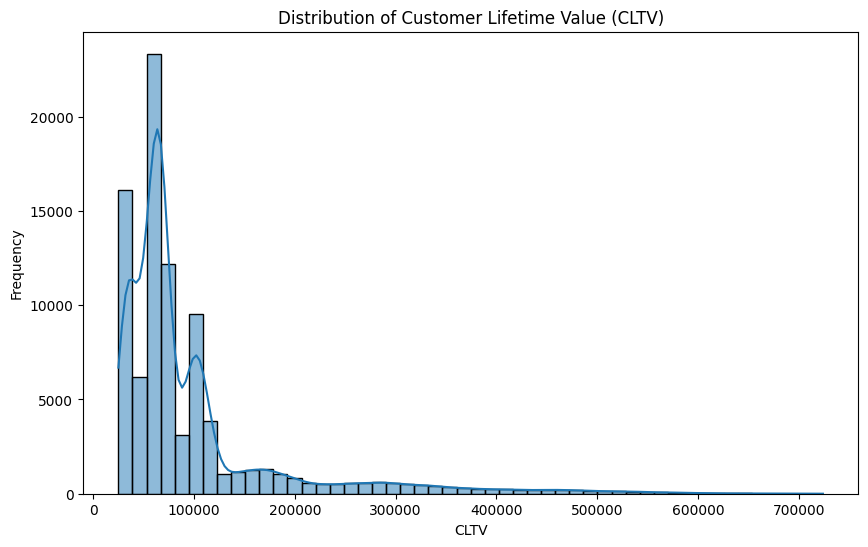

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(train_df['cltv'], bins=50, kde=True)
plt.title('Distribution of Customer Lifetime Value (CLTV)')
plt.xlabel('CLTV')
plt.ylabel('Frequency')
plt.show()

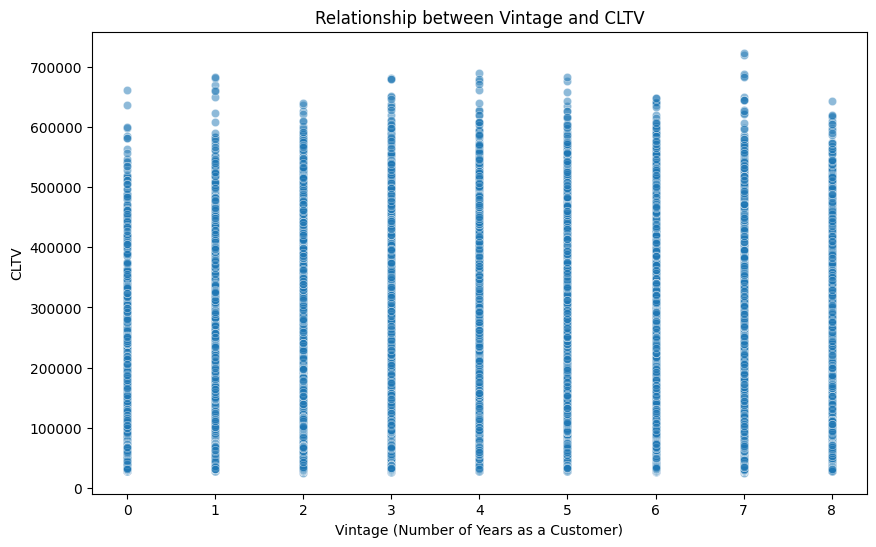

In [14]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='vintage', y='cltv', data=train_df, alpha=0.5)
plt.title('Relationship between Vintage and CLTV')
plt.xlabel('Vintage (Number of Years as a Customer)')
plt.ylabel('CLTV')
plt.show()